In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
from sklearn.linear_model import LogisticRegression
#로지스틱 회귀를 이용

In [3]:
train_data = pd.read_csv("./titanic_train.csv")
test_data = pd.read_csv("./titanic_test.csv")
gender_submission = pd.read_csv("./titanic_gender_submission.csv")
#데이터 셋 불러오기

In [4]:
print(train_data.columns.values)
#변수보기

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


In [5]:
#데이터 미리 보기
train_data.head()
#PassengerId: 각 승객의 고유번호
#Survived: 생존여부(종속변수)(0: 사망, 1: 생존)
#Pclass: 객실등급(1st: Upper, 2nd = Middle, 3rd = Lower)
#Name: 이름
#Sex: 성별
#SibSp: 동반한 Sibling(형제자매)와 Spouse(배우자)의 수
#Parch: 동반한 Parent(부모)와 Child(자식)의 수
#Ticket: 티켓의 고유넘버
#Fare: 티켓의 요금
#Cabin: 객실 번호
#Embarked: 승선한 항(C = Cherbourg, Q = Queenstown, S = Southampton)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
train_data.info() #train 자료 정보

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
# 테스트 자료 정보
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [8]:
# train 자료 int, float 변수 통계치
train_data.describe()
# train 자료 샘플 수

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
# train 자료 object 변수 통계치
train_data.describe(include=['O'])
# train 자료 남성 수: 577명
# train 자료 가장 많은 승선지: S, 644명

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Pears, Mrs. Thomas (Edith Wearne)",male,CA. 2343,G6,S
freq,1,577,7,4,644


In [10]:
train_data[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)
#groupby에 as_index를 False로 하면 Pclass를 index로 사용하지 않음
# ascending : 오름차순
# as_index를 True로 하면 Pclass를 index로 사용

# 객실 등급이 좋을수록 생존율이 높음

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [11]:
train_data[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)
# train 자료에서 성별(Sex)에 따른 생존율 비교

#여성의 생존율이 남성보다 높음

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [12]:
train_data[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)
# train 자료에서 함께 승선한 형제자매와 배우자 수(SibSp)에 따른 생존율 비교

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [13]:
train_data[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)
# train 자료에서 함께 승선한 부모와 자식 수(Parch)에 따른 생존율 비교

# 동행이 적은 경우, 생존율이 높음

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


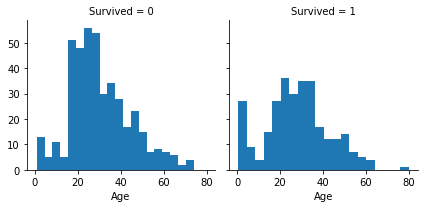

In [14]:
# train 자료에서 생존 여부(Survived)에 따른 연령(Age) 분포
# 열(col)을 생존 여부로 나눔
g = sns.FacetGrid(train_data, col='Survived')
# 히스토그램으로 시각화, 연령의 분포를 확인, 히스토그램 bin을 20개로 설정
g.map(plt.hist, 'Age', bins=20)

# 4세 이하의 유아의 생존율 높음
# 15 ~ 25세 승객들의 생존율 높음

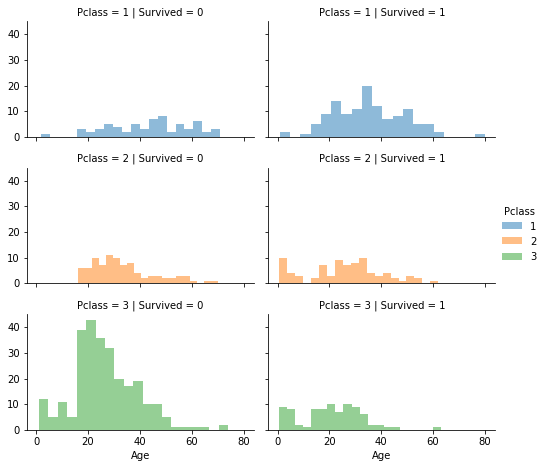

In [15]:
# train 자료에서 객실 등급(Pclass)과 생존 여부(Survived)에 따른 연령(Age) 분포
# 열을 생존 여부, 행(row)과 색깔(hue)을 객실 등급으로 나눔, width = height * aspect
grid = sns.FacetGrid(train_data, col='Survived', row='Pclass', hue="Pclass", height=2.2, aspect=1.6)

grid.map(plt.hist, 'Age', alpha=.5, bins=20) # 투명도(alpha): 0.5

# 범례 추가
grid.add_legend();

# 객실 등급이 3등급인 경우, 승객 수는 가장 많고, 생존율도 가장 낮음
# 객실 등급이 2등급인 유아는 대부분 생존함
# 객실 등급이 1등급인 경우 생존율이 비교적 높음

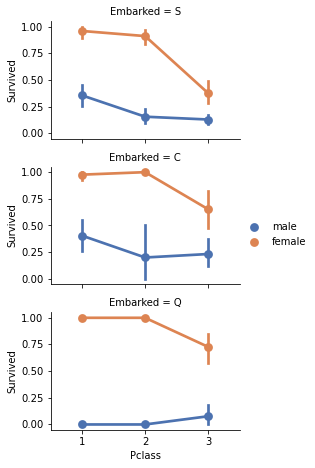

In [16]:
# train 자료에서 승선지(Embarked)와 객실 등급(Pclass)에 따른 생존율(Survived)
grid = sns.FacetGrid(train_data, row='Embarked', height=2.2, aspect=1.6)

# Pointplot으로 시각화, x: 객실 등급, y: 생존 여부, 색깔: 성별, x축 순서: [1, 2, 3], 색깔 순서: [남성, 여성]
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep', order = [1, 2, 3], hue_order = ["male", "female"])

grid.add_legend()

# 승선지가 C와 Q인 경우, 남성의 티켓 등급이 3등급일 때 2등급보다 생존율이 높을 가능성이 있음

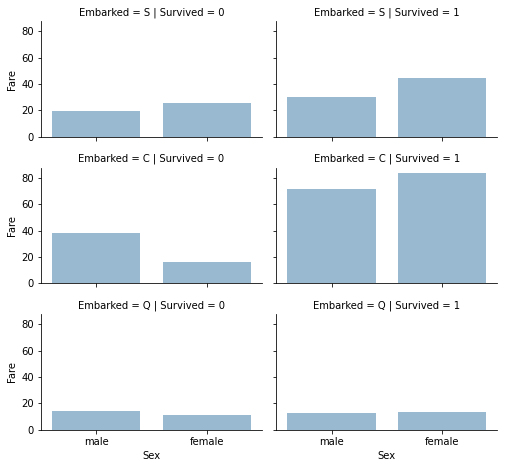

In [17]:
# train 자료에서 승선지(Embarked), 생존 여부(Survived), 성별(Sex)에 따른 요금(Fare)
grid = sns.FacetGrid(train_data, row='Embarked', col='Survived', height=2.2, aspect=1.6)

# 바그래프로 시각화, x: 성별, y: 요금, Error bar: 표시 안 함
grid.map(sns.barplot, 'Sex', 'Fare', alpha=.5, ci=None,order=["male","female"])

grid.add_legend()

# 승선지가 S 또는 C인 경우, 생존한 승객들의 평균 요금이 비교적 높음

In [18]:
# 안쓰는 변수(Ticket, Cabin) 제거
print("Before", train_data.shape, test_data.shape)

# 열(axis=1)제거
train_data = train_data.drop(['Ticket', 'Cabin'], axis=1)
test_data = test_data.drop(['Ticket', 'Cabin'], axis=1)
combine = [train_data, test_data]
print("After", train_data.shape, test_data.shape)

Before (891, 12) (418, 11)
After (891, 10) (418, 9)


In [19]:
for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

pd.crosstab(train_data['Title'], train_data['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [20]:
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
 	'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    
train_data[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.347826


In [21]:
# title 변수를 숫자형 변수로 바꿈
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)

train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1


In [22]:
# 안쓸 변수(Name, PassengerId) 제거
train_data = train_data.drop(['Name', 'PassengerId'], axis=1)
test_data = test_data.drop(['Name'], axis=1)
combine = [train_data, test_data]
train_data.shape, test_data.shape

((891, 9), (418, 9))

In [23]:
# 성별(Sex) 변수를 숫자 범주형 변수로 바꿈
for dataset in combine:
    dataset['Sex'] = dataset['Sex'].map( {'female': 1, 'male': 0} ).astype(int)

train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22.0,1,0,7.2500,S,1
1,1,1,1,38.0,1,0,71.2833,C,3
2,1,3,1,26.0,0,0,7.9250,S,2
3,1,1,1,35.0,1,0,53.1000,S,3
4,0,3,0,35.0,0,0,8.0500,S,1


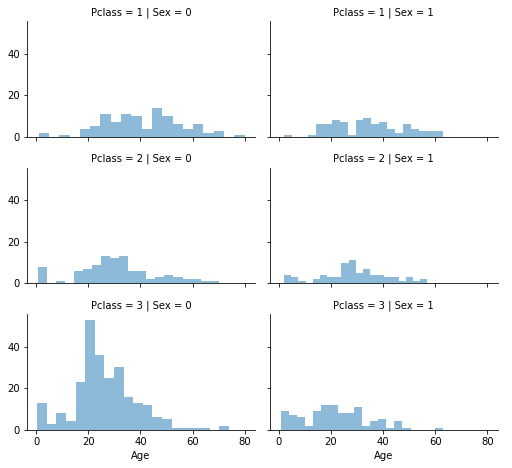

In [24]:
# 객실 등급(Pclass)과 성별(Sex) 시각화
grid = sns.FacetGrid(train_data, row='Pclass', col='Sex', height=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend()

In [25]:
guess_ages = np.zeros((2,3))
for dataset in combine:
    for i in range(0, 2):
        for j in range(0, 3):
            guess_data = dataset[(dataset['Sex'] == i) & \
                                  (dataset['Pclass'] == j+1)]['Age'].dropna()
            # 위에서 guess_ages사이즈를 [2,3]으로 잡아뒀으므로 j의 범위도 이를 따름
            
            age_guess = guess_data.median()

            # age의 random값의 소수점을 .5에 가깝도록 변형
            guess_ages[i,j] = int( age_guess/0.5 + 0.5 ) * 0.5
            
    for i in range(0, 2):
        for j in range(0, 3):
            dataset.loc[ (dataset.Age.isnull()) & (dataset.Sex == i) & (dataset.Pclass == j+1),\
                    'Age'] = guess_ages[i,j]

    dataset['Age'] = dataset['Age'].astype(int)

train_data.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
Title       0
dtype: int64

In [26]:
# 연령(Age) 변수를 범주형 변수로 바꿔줌
train_data['AgeBand'] = pd.cut(train_data['Age'], 5)
# 임의로 5개 그룹을 지정
train_data[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)

,AgeBand,Survived
0,"(-0.08, 16.0]",0.550000
1,"(16.0, 32.0]",0.337374
2,"(32.0, 48.0]",0.412037
3,"(48.0, 64.0]",0.434783
4,"(64.0, 80.0]",0.090909


In [27]:
# AgeBand를 바탕으로 Age를 범주형 변수로 바꿔준 후, AgeBand변수는 제거
for dataset in combine:    
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age']
train_data = train_data.drop(['AgeBand'], axis=1)
combine = [train_data, test_data]
train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,1,1,0,7.2500,S,1
1,1,1,1,2,1,0,71.2833,C,3
2,1,3,1,1,0,0,7.9250,S,2
3,1,1,1,2,1,0,53.1000,S,3
4,0,3,0,2,0,0,8.0500,S,1


In [28]:
# SibSp와 Parch를 가족과의 동반여부를 알 수 있는 새로운 변수로 통합
for dataset in combine:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1

train_data[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean().sort_values(by='Survived', ascending=False)

# FamilySize가 1인 것은 가족과 동반하지 않음을 의미

,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


In [29]:
for dataset in combine:
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1

train_data[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean()

# 1은 동반하지 않음
# 0은 동반했다는 새로운 변수 IsAlone을 생성

,IsAlone,Survived
0,0,0.505650
1,1,0.303538


In [30]:
train_data = train_data.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
test_data = test_data.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
combine = [train_data, test_data]
train_data.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,0,3,0,1,7.2500,S,1,0
1,1,1,1,2,71.2833,C,3,0
2,1,3,1,1,7.9250,S,2,1
3,1,1,1,2,53.1000,S,3,0
4,0,3,0,2,8.0500,S,1,1


In [31]:
# Age변수와 Pclass를 곱한 Age*Class변수 생성
for dataset in combine:
    dataset['Age*Class'] = dataset.Age * dataset.Pclass

train_data.loc[:, ['Age*Class', 'Age', 'Pclass']].head(10)

,Age*Class,Age,Pclass
0,3,1,3
1,2,2,1
2,3,1,3
3,2,2,1
4,6,2,3
5,3,1,3
6,3,3,1
7,0,0,3
8,3,1,3
9,0,0,2


In [32]:
#승선지(Ebmarked) 변수를 최빈값으로 대체
freq_port = train_data.Embarked.dropna().mode()[0]
freq_port

'S'

In [33]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].fillna(freq_port)
    
train_data[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


In [34]:
# 승선지(Ebmarked) 변수를 범주형 변수로 바꿔줌
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

train_data.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,0,3,0,1,7.2500,0,1,0,3
1,1,1,1,2,71.2833,1,3,0,2
2,1,3,1,1,7.9250,0,2,1,3
3,1,1,1,2,53.1000,0,3,0,2
4,0,3,0,2,8.0500,0,1,1,6


In [35]:
# 요금(Fare) 변수를 중앙값으로 대체
test_data['Fare'].fillna(test_data['Fare'].dropna().median(), inplace=True)
test_data.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,892,3,0,2,7.8292,2,1,1,6
1,893,3,1,2,7.0000,0,3,0,6
2,894,2,0,3,9.6875,2,1,1,6
3,895,3,0,1,8.6625,0,1,1,3
4,896,3,1,1,12.2875,0,3,0,3


In [36]:
# 요금(Fare)을 숫자 범주형 변수로 바꿔줌
train_data['FareBand'] = pd.qcut(train_data['Fare'], 4)
train_data[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand', ascending=True)

,FareBand,Survived
0,"(-0.001, 7.91]",0.197309
1,"(7.91, 14.454]",0.303571
2,"(14.454, 31.0]",0.454955
3,"(31.0, 512.329]",0.581081


In [37]:
for dataset in combine:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)

train_data = train_data.drop(['FareBand'], axis=1)
combine = [train_data, test_data]
    
train_data.head(10)

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,0,3,0,1,0,0,1,0,3
1,1,1,1,2,3,1,3,0,2
2,1,3,1,1,1,0,2,1,3
3,1,1,1,2,3,0,3,0,2
4,0,3,0,2,1,0,1,1,6
5,0,3,0,1,1,2,1,1,3
6,0,1,0,3,3,0,1,1,3
7,0,3,0,0,2,0,4,0,0
8,1,3,1,1,1,0,3,0,3
9,1,2,1,0,2,1,3,0,0


In [38]:
test_data.head(10)

# 이제 train 데이터 셋 준비완료

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,892,3,0,2,0,2,1,1,6
1,893,3,1,2,0,0,3,0,6
2,894,2,0,3,1,2,1,1,6
3,895,3,0,1,1,0,1,1,3
4,896,3,1,1,1,0,3,0,3
5,897,3,0,0,1,0,1,1,0
6,898,3,1,1,0,2,2,1,3
7,899,2,0,1,2,0,1,0,2
8,900,3,1,1,0,1,3,1,3
9,901,3,0,1,2,0,1,0,3


In [39]:
# 데이터 준비
# 목적 변수 제거
X_train = train_data.drop("Survived", axis=1)
#목적 변수 역할
Y_train = train_data["Survived"]
#예측 대상 데이터 셋
X_test  = test_data.drop("PassengerId", axis=1).copy()
X_train.shape, Y_train.shape, X_test.shape

((891, 8), (891,), (418, 8))

In [40]:
# Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
acc_log

80.36

In [41]:
coeff_df = pd.DataFrame(train_data.columns.delete(0))
coeff_df.columns = ['Feature']
coeff_df["Correlation"] = pd.Series(logreg.coef_[0])

coeff_df.sort_values(by='Correlation', ascending=False)

# 생존 여부 예측에 영향력이 큰 변수는 성별(Sex)

,Feature,Correlation
1,Sex,2.201619
5,Title,0.397888
2,Age,0.287011
4,Embarked,0.261473
6,IsAlone,0.126553
3,Fare,-0.086655
7,Age*Class,-0.311069
0,Pclass,-0.750700


In [42]:
gender_submission = pd.DataFrame({
        "PassengerId": test_data["PassengerId"],
        "Survived": Y_pred
    })
gender_submission.to_csv('titanic_gender_submission.csv', index = False)

In [43]:
my_prediction = pd.read_csv('titanic_gender_submission.csv')
my_prediction.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [44]:
import torch
import torchvision
import torchvision.transforms as transforms

In [45]:
batch_size = 4

trainset = torchvision.datasets.CIFAR10(
    root='./data', 
    train=True,
    download=True, 
    transform=torchvision.transforms.ToTensor()
)
train_loader = torch.utils.data.DataLoader(
    trainset, 
    batch_size=batch_size,
    shuffle=True
)

testset = torchvision.datasets.CIFAR10(
    root='./data', 
    train=False,
    download=True, 
    transform=torchvision.transforms.ToTensor()
)
test_loader = torch.utils.data.DataLoader(
    testset, 
    batch_size=batch_size,
    shuffle=False
)

classes = trainset.classes
classes

Files already downloaded and verified
Files already downloaded and verified


['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

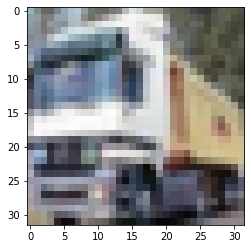

In [46]:
import matplotlib.pyplot as plt

images=train_loader.dataset[1][0]
plt.imshow(images.permute(1, 2, 0))

In [47]:
images.size() # [3, 32, 32]: 3 -> RGB, 32x32 

torch.Size([3, 32, 32])

In [48]:
# 데이터 정규화
transform = transforms.Compose(
[transforms.ToTensor(),
transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

In [49]:
import matplotlib.pyplot as plt
import numpy as np

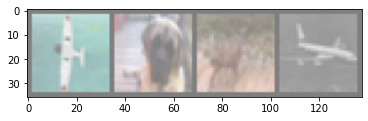

airplane   dog  deer airplane


In [50]:
#이미지 확인하기
def imshow(img):
    img = img / 2 + 0.5 # 정규화 해제
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()
    
# 학습용 이미지 뽑기
data_iter = iter(train_loader)
images, labels = data_iter.next()
# 이미지 보여주기
imshow(torchvision.utils.make_grid(images))
# 이미지별 라벨 (클래스) 보여주기
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))
# batch_size가 4였기 때문에, 한번에 4개씩 뽑아와서 학습

In [51]:
import torch.nn as nn
import torch.nn.functional as F
class Net(nn.Module):
    def __init__(self): # 생성자, 생성됨과 동시에 함수 정의
        super(Net, self).__init__()
    
        #input = 3, output = 6, kernal = 5
        self.conv1 = nn.Conv2d(3, 6, 5)
        #kernal = 2, stride = 2, padding = 0 (default)
        self.pool = nn.MaxPool2d(2, 2) # 결과물 크기 반으로 줄이기
        self.conv2 = nn.Conv2d(6, 16, 5)
        #input feature, output feature
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)
    # 값 계산
    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

net = Net()

In [54]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss() # Loss, 손실함수 CrossEntropyLoss
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)
# 가중치를 조절하는 lr(learning_rate)를 조절하는 optimizer
# SGD방식은 매번 실행할 때 마다 기울기를 계산해서 바꾸는게 아니라 확률적으로 선택된 부분마다 바꾸는 방법
# momentum은 일정한 비율만 수정하게 하는 방법

In [55]:
# 학습하기
for epoch in range(5): #데이터셋 5번 받기

    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        # 입력 받기 (데이터 [입력, 라벨(정답)]으로 이루어짐)
        inputs, labels = data
    
        #학습
        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward() # 역전파
        optimizer.step() # 최적화
    
        # 결과 출력
        running_loss += loss.item()
        if i % 5000 == 4999: # print every 5000개마다
            print('[%d, %5d] loss: %.3f' %
                (epoch + 1, i + 1, running_loss / 5000))
            running_loss = 0.0
        
print('Finished Training')

#여기에 학습한 모델 저장
PATH = './cifar_net.pth'
torch.save(net.state_dict(), PATH)

[1,  5000] loss: 2.114
[1, 10000] loss: 1.716
[2,  5000] loss: 1.470
[2, 10000] loss: 1.421
[3,  5000] loss: 1.333
[3, 10000] loss: 1.302
[4,  5000] loss: 1.231
[4, 10000] loss: 1.224
[5,  5000] loss: 1.164
[5, 10000] loss: 1.165
Finished Training


In [56]:
#optimizer의 기울기를 0으로 만들기 (변화도가 누적되지 않게 하기 위해)
optimizer.zero_grad()
# output 구하기
outputs = net(inputs)
# loss 계산
loss = criterion(outputs, labels)
#backpropagation (기울기 계산)
loss.backward()
#업데이트
optimizer.step()

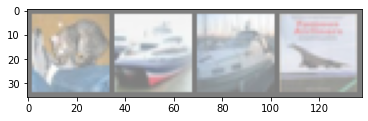

GroundTruth:    cat  ship  ship airplane
Predicted:    dog  ship truck  ship


In [57]:
# 신경망이 잘 학습했는지 확인
data_iter = iter(test_loader)
images, labels = data_iter.next()

# 실험용 데이터와 결과 출력
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

# 학습한 모델로 예측값 뽑아보기
net = Net()
net.load_state_dict(torch.load(PATH))
outputs = net(images)
_, predicted = torch.max(outputs, 1)
print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                                for j in range(4)))

In [58]:
# 전체 데이터셋 확인
correct = 0
total = 0
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 55 %


In [59]:
# model이 어떤 class에서 잘 분류하고, 어떤 class에서 잘 분류하지 못하는지 확인
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of airplane : 45 %
Accuracy of automobile : 56 %
Accuracy of  bird : 47 %
Accuracy of   cat : 42 %
Accuracy of  deer : 54 %
Accuracy of   dog : 50 %
Accuracy of  frog : 43 %
Accuracy of horse : 63 %
Accuracy of  ship : 77 %
Accuracy of truck : 69 %


이번에 분석을 하게 된 CIFAR10의 예제는 RGB 3채널의 이미지들로 airplane, automobile, bird, cat, deer, dog, frog, horse, ship, truck의 클래스가 섞여있다. 이 클래스의 사진들을 분류할 수 있도록 학습을 시켰다. 이미지 분류기를 학습하는 과정은 torchvision을 사용하여 CIFAR training, test 데이터 셋을 불러오고 정규화시키고, CNN을 정의하고, Loss와 Optimizer를 정의하고, Training 데이터로 학습을 시킨 후, Test 데이터로 테스트를 해보는 과정이 되겠다. 그래서 torchvision을 사용하여 데이터들을 불러온다. 원래 이미지는 RGB 채널마다 0~255사이의 값인데 torchvision으로 불러오는 데이터 셋은 0~1범위의 PILImage이다. 이러한 이미지를 -1~1범위로 사용하기 위해 Tensor로 정규화를 시켜준다. 데이터를 잘 가져왔나 이미지를 확인하였다.
데이터의 3차원 형상을 살리면서 학습하기 위해서 CNN을 사용하였다.
criterion은 손실함수를 정하는 부분인데, 손실함수는 실제값과 예측값에 대한 차이, 한마디로 얼마나 틀리게 생각했냐라는 뜻인데, 여기서 사용한 방법은 CrossEntropyError이다. lr(learning rate)를 조절하기 위해 optimizer를 설정하고, momentum을 줌으로써 같은 방향으로 일정한 비율만 수정하게 하는 방법을 쓴다. Epoch는 적당히 5번으로 설정하였다. 너무 많으면 과적합 문제가 발생하여 너무 훈련 데이터에만 최적화를 하여 테스트 데이터에서 이상한 결과가 나와버리기 때문에 5번으로 설정하였다. 신경망이 잘 학습했는지 확인하기 위해서 결과를 확인해보았다. 하지만 이것은 일부 데이터에 불과하기 때문에, 전체 데이터 셋에서는 어떻게 동작하는지 test 정확도를 통해 55%의 정확도를 확인하였다. 그리고 model이 어떤 class에서 잘 분류하고, 어떤 class에서 잘 분류하지 못하는지를 알아보았다. 결과를 보아 cat, airplane, frog, bird, deer, dog의 정확도는 전체보다 정확도